# This Notebook is for task 3, word embedding(word2vec)

In [1]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50,
    workers = 4
)

In [3]:
TOKENS=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/TOKENS.pickle")


In [4]:
TOKENS

pos_tuple  pos   token_str    term_str
doc_id  token_num                                               
5597916 0           (examples, NNS)  NNS    examples    examples
        1          (analytical, JJ)   JJ  analytical  analytical
        2               (data, NNS)  NNS        data        data
        3               (were, VBD)  VBD        were        were
        4           (recorded, VBN)  VBN    recorded    recorded
...                             ...  ...         ...         ...
5619621 4717       (permitted, VBN)  VBN   permitted   permitted
        4718               (by, IN)   IN          by          by
        4719              (the, DT)   DT         the         the
        4720            (prior, JJ)   JJ       prior       prior
        4721              (art, NN)   NN         art         art

[5820454 rows x 4 columns]

In [5]:
VOCAB=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/VOCAB.pickle")


In [6]:
VOCAB

,n,p,i,n_chars,max_pos,n_pos,stop,p_stem
term_str,,,,,,,,
the,516192,8.868587e-02,3.495152,3,DT,1,1,the
of,211333,3.630868e-02,4.783542,2,IN,1,1,of
a,166947,2.868281e-02,5.123670,1,DT,1,1,a
to,140073,2.406565e-02,5.376881,2,TO,1,1,to
and,132468,2.275905e-02,5.457416,3,CC,1,1,and
...,...,...,...,...,...,...,...,...
aspleugluglugluglugluglugluglugluglugluaspglnlys,1,1.718079e-07,22.472700,48,NN,1,0,aspleugluglugluglugluglugluglugluglugluaspglnli
argthrpheleuprogluglnasnproaspmetproprohisleupro,1,1.718079e-07,22.472700,48,JJ,1,0,argthrpheleuprogluglnasnproaspmetproprohisleupro
glyleuproserproprotyrglythrmetaspserserhisvalphe,1,1.718079e-07,22.472700,48,NN,1,0,glyleuproserproprotyrglythrmetaspserserhisvalph


In [7]:
DOCS = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby('doc_id')\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()


In [8]:
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [9]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

## Terms and embeddings,  added to the VOCAB table

In [10]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.index_to_key
    )).set_index('term_str')

In [11]:
coords

,vector
term_str,
the,"[-0.25274003, 0.255246, 0.024444377, -0.300945..."
of,"[-0.6623019, -1.1752541, -0.06114909, -0.13470..."
a,"[0.8756034, 0.10767633, 0.6467044, -0.82046354..."
to,"[-1.0832641, 1.1594529, 0.5227218, 1.3298762, ..."
and,"[0.101305544, -1.2634513, 0.8298358, 0.6071762..."
...,...
bgtbp,"[0.11247586, -0.15739597, -0.109127946, -0.148..."
upshift,"[-0.036848824, -0.07296731, 0.05530185, -0.108..."
handler,"[0.109642364, 0.04416503, 0.044215653, 0.08233..."


In [12]:
coords.to_csv(f'/Users/Lingmin/Desktop/Patent_project/data/coords.csv')

In [18]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(np.array(coords.vector.to_list()))

In [19]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

# add some vocab feature

In [20]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [21]:
coords = coords[coords.stop == 0]

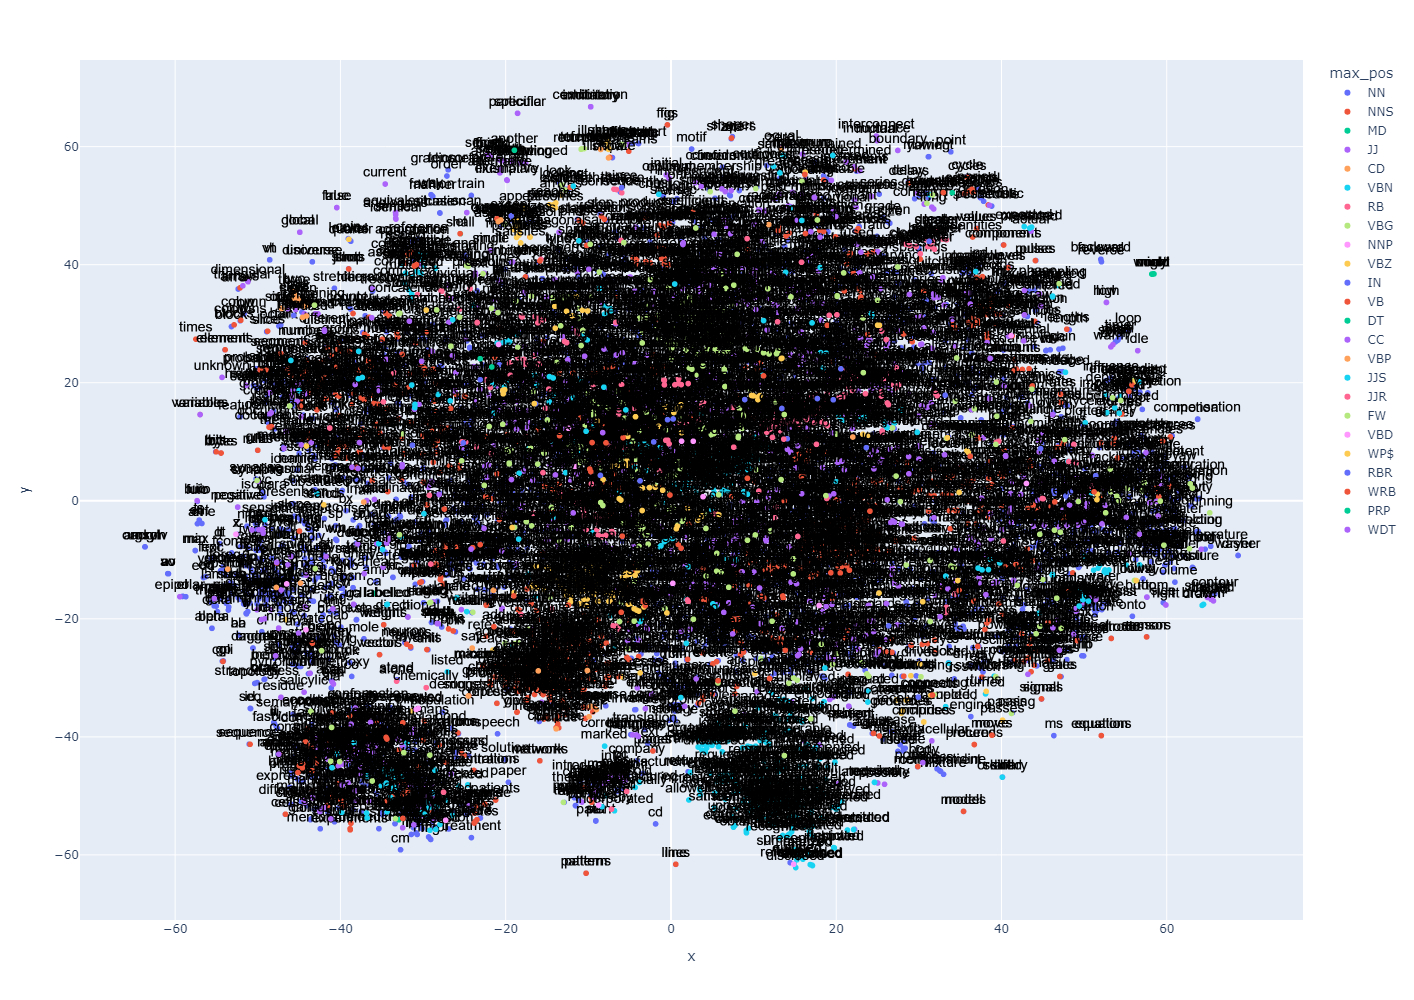

In [23]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           #vector_size='tfbidf_max',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')